In [2]:
from matplotlib import pyplot as plt
#plt.plot(x,y)

#    []

In [35]:
def nyquist(im, re):
    from matplotlib import pyplot as plt
    plt.plot(re, im, '-o')
    plt.ylabel("Imaginärteil")
    plt.xlabel("Realteil")
    plt.title("Nyquistplot: Impedanz Z")
    #plt.xlim(-500, 10500)
    #plt.ylim(-0.5,10)
    plt.show()


In [36]:
def bode( R, phase, omega):
    import math
    y = []
    for i in R:
        y += [math.log(i,10)]
    x = []
    for j in omega:
        x += [math.log(j,10)]

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y)
    ax1.set_ylabel('Logarithmus des Impedanzbetrages')
    #ax1.set_ylim(-0.5,10)
    

    ax2 = ax1.twinx()
    ax2.plot(x, phase, 'r-')
    ax2.set_ylabel('Phasenverschiebung', color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    #ax2.set_ylim(-5,100)
    
    ax1.set_xlabel("Logarithmus der Kreisfrequenz")
    plt.title("Bode-Plot")
    ax1.set_xlim(-0.1, 6)
    
    plt.show()

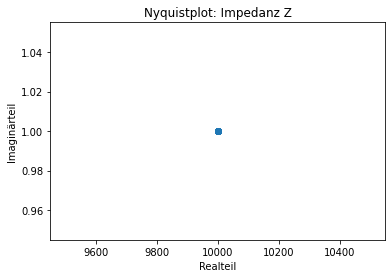

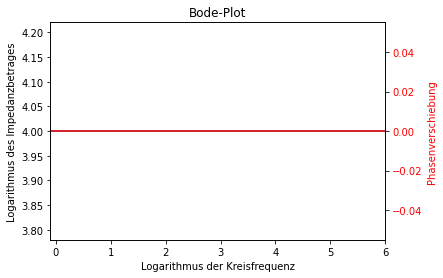

In [60]:
omega = [0.001, 0.01,0.05, 0.1, 0.5,1, 5, 10, 50,100, 500,1000, 5000, 10000, 50000, 100000, 500000, 1000000]

import math
R_widerstand = [10000]*len(omega)
phase_widerstand = [0]*len(omega)
im_widerstand = []
for i in phase_widerstand:
    im_widerstand+= [ math.e**i ]
re_widerstand = R_widerstand

nyquist(im_widerstand, re_widerstand)
bode(R_widerstand, phase_widerstand, omega)

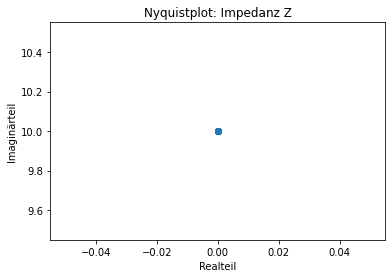

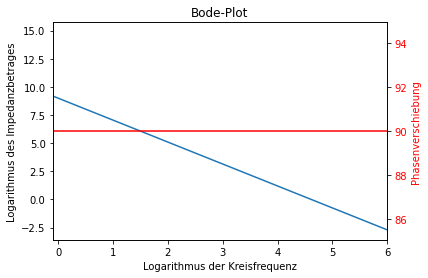

In [65]:
re_kondensator = [0]*len(omega)
import math
omega_max = 10**6
omegamax = math.log(omega_max, 20)

phase_kondensator = [90]*len(omega)

R_kondensator = []
for i in range(len(omega)):
    R_kondensator += [( omega[i]**(-(phase_kondensator[i])/(10*omegamax))) * (10**(phase_kondensator[i]/10)) ]

im_kondensator = []
for i in phase_kondensator:
    im_kondensator+= [ 10 ]


nyquist(im_kondensator, re_kondensator)
#print(im_kondensator, re_kondensator)
bode(R_kondensator, phase_kondensator, omega)

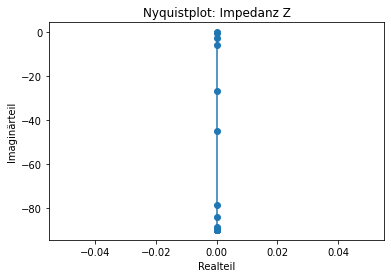

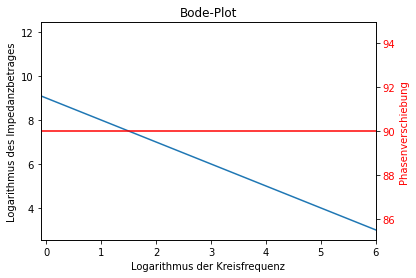

In [70]:
re_kondensator = [0]*len(omega)
import math
omega_max = 10**6
omegamax = math.log(omega_max, 20)

phase_kondensator = []
for i in range(len(omega)):
    phase_kondensator += [
        (math.pi /2)/(math.pi/180)
        #math.atan(omega[i])
    ]

R_kondensator = []
for i in range(len(omega)):
    s= omega[i]
    R_kondensator += [
         100000/(s*0.0001)  
        #(s/10+1 )/(s * (s/3+1))
        #s/(((s+1)**2) *(s/10+1))
    ]

im_kondensator = []
j=0
for i in range(len(phase_kondensator)):
    j +=1
    im_kondensator+= [ 
        #math.log(phase_kondensator[i]) 
        #math.e**phase_kondensator[i]
        #j
        - math.atan(omega[i])*180/math.pi
    ]


nyquist(im_kondensator, re_kondensator)
#print(im_kondensator, re_kondensator)
bode(R_kondensator, phase_kondensator, omega)

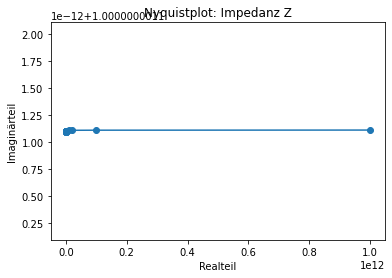

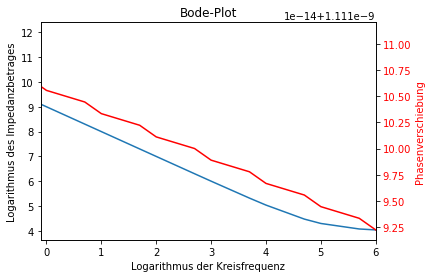

In [77]:
#Reihenschaltung: Summieren
R_reihe = []
for i in range(len(omega)):
    R_reihe += [R_widerstand[i] + R_kondensator[i] ]

phase_reihe = []
m = (10**(-9))/((10**5)-(10**6))
for i in range(len(omega)):
    phase_reihe += [
        #phase_widerstand[i] + phase_kondensator[i] 
        m * i + - (10**6) * m
    ]


im_reihe =[]
for i in phase_reihe:
    im_reihe+= [
        math.e**i 
        #- math.atan(i)*180/math.pi
                    ]
    
    
nyquist(im_reihe, R_reihe)
bode(R_reihe, phase_reihe, omega)

In [76]:
(10**(-9))/((10**5)-(10**6))

-1.1111111111111112e-15

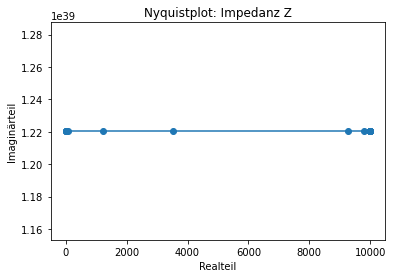

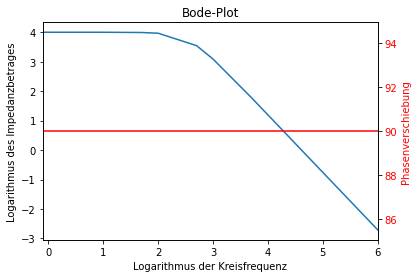

In [66]:
#Parallelschaltung: Addition reziproker Werte

R_reihe = []
for i in range(len(omega)):
    R_reihe += [(1/R_widerstand[i] + 1/R_kondensator[i] )**(-1)]

phase_reihe = []
for i in range(len(omega)):
    phase_reihe += [(#1/phase_widerstand[i] + 
        1/phase_kondensator[i])**(-1) ]


im_reihe =[]
for i in phase_reihe:
    im_reihe+= [ math.e**i ]
    
    
nyquist(im_reihe, R_reihe)
bode(R_reihe, phase_reihe, omega)


In [ ]:
#elektrochem. Zelle = Parallel + extra Widerstand